Classification Report:               precision    recall  f1-score   support

           0       0.85      0.29      0.44      1105
           1       0.39      0.90      0.55       560

    accuracy                           0.50      1665
   macro avg       0.62      0.60      0.49      1665
weighted avg       0.70      0.50      0.47      1665

Confusion Matrix:
[[324 781]
 [ 57 503]]
[0.51355838 0.58626659 0.5345474  0.57431296 0.56157049] 0.5540511650973489
152.40625
[4450. 2210.]
[0 1]
1067


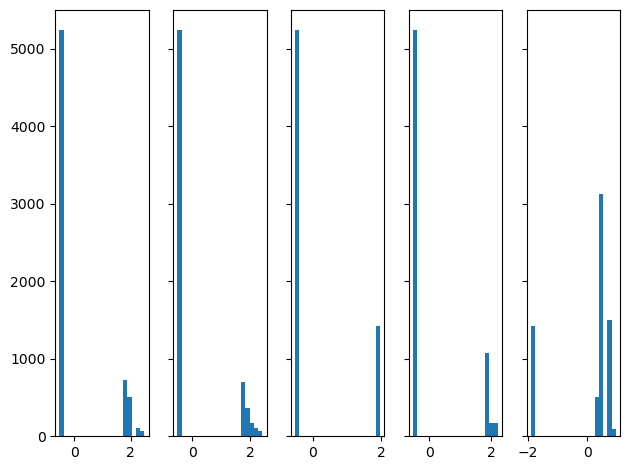

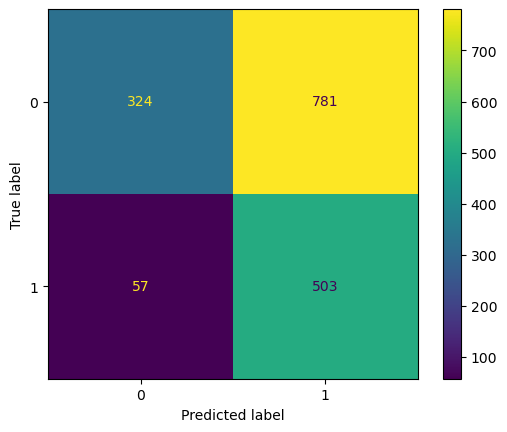

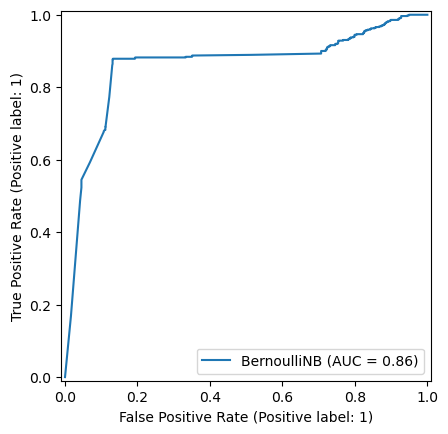

In [114]:
import pandas as pd
import time

df = pd.read_csv('Images_All.csv')

drop_columns = ['image_name', 'folder_name', 'flooding']
X = df.drop(columns=drop_columns)       # Features
y = df['flooding'].astype(int)          # Target

#one hot encoding (for categorical cols) and scaling (for numerical)
from sklearn.preprocessing import StandardScaler

categorical_columns = [col for col in X.columns if X[col].dtype == 'object']
numerical_columns = [col for col in X.columns if col not in categorical_columns]
X = pd.get_dummies(X, columns=categorical_columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Naive Bayes Model
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report: "   + classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(scores, scores.mean())

#Time metric
print(time.process_time())

#Data info
print(model.class_count_)
print(model.classes_)
print(model.n_features_in_)

fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True)

axs[0].hist(X_train[:,1], bins=20)
axs[1].hist(X_train[:,2], bins=20)
axs[2].hist(X_train[:,3], bins=20)
axs[3].hist(X_train[:,4], bins=20)
axs[4].hist(X_train[:,5], bins=20)

plt.show()

#Graphing confusion matrix, ROC curve, and 5-fold validation results
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

model_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()